In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/colocalization_scores')

In [1]:
IBM=['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
colour_dict={
    'ext':IBM[1],
    'ext_alt':IBM[0],
    'ext_munged':IBM[1],
    'ext_munged_alt':IBM[0],
    'loco':IBM[4],
    'loco_alt':IBM[3],
    'loco_gsem':IBM[4],
    'loco_gsem_alt':IBM[3],
    'shared':IBM[2],
    'other':'#CCCCCC',
    'shared_alt':'#780534'
}

In [2]:
interactome='PCNet2.0'

In [3]:
save_fig=False

In [42]:
plt.rcParams.update({'font.size': 16})

# import all datasets as a table

In [7]:
files=os.listdir()
files.remove('.ipynb_checkpoints')

In [8]:
files=[x for x in files if interactome in x]
files=[x for x in files if ~('munged' in x)]

In [9]:
tbl=pd.DataFrame()
for f in files:
    print(f)
    t=pd.read_csv(f,sep='\t')
    tbl=pd.concat([tbl,t],axis=0,ignore_index=True)
    print(len(tbl))

colocScore_loco_FDR_LDL_top500_PCNet2.0.tsv
60
colocScore_loco_gsem_FDR_age_menarche_FDR_PCNet2.0.tsv
120
colocScore_loco_FDR_age_menarche_bonf_PCNet2.0.tsv
180
colocScore_loco_FDR_townsend_top500_PCNet2.0.tsv
240
colocScore_loco_FDR_ext_munged_FDR_PCNet2.0.tsv
300
colocScore_loco_bonf_ext_st22_PCNet2.0.tsv
301
colocScore_loco_FDR_antisoc_bonf_PCNet2.0.tsv
361
colocScore_loco_gsem_FDR_neurot_bonf_PCNet2.0.tsv
421
colocScore_loco_FDR_infant_bw_bonf_PCNet2.0.tsv
481
colocScore_loco_FDR_ext_munged_bonf_PCNet2.0.tsv
541
colocScore_loco_FDR_LDL_FDR_PCNet2.0.tsv
601
colocScore_loco_gsem_FDR_age_smkinit_top500_PCNet2.0.tsv
661
colocScore_loco_gsem_FDR_friend_sat_FDR_PCNet2.0.tsv
721
colocScore_loco_bonf_ext_bonf_PCNet2.0.tsv
722
colocScore_loco_gsem_FDR_townsend_top500_PCNet2.0.tsv
782
colocScore_loco_FDR_neurot_bonf_PCNet2.0.tsv
842
colocScore_loco_FDR_hr_bonf_PCNet2.0.tsv
902
colocScore_loco_gsem_FDR_facial_hair_FDR_PCNet2.0.tsv
962
colocScore_loco_gsem_FDR_facial_hair_top500_PCNet2.0.tsv
1

In [145]:
subset='top500'
tbl_sub=tbl[(tbl['z_comb']==3)&(tbl['z_12']==1.5)&(tbl['rat_dataset']=='loco_gsem_FDR')&(tbl['human_dataset'].str.contains(subset))]

In [146]:
tbl_sub=tbl_sub.dropna(axis=0)

In [147]:
tbl_sub['lower_error'] = tbl_sub.apply(lambda x: x['obs_exp'] - x['observed_overlap']/(x['expected_overlap_mean']+ 1.96*x['expected_overlap_std']), axis = 1)
tbl_sub['upper_error'] = tbl_sub.apply(lambda x: x['observed_overlap']/(x['expected_overlap_mean'] - 1.96*x['expected_overlap_std']) - x['obs_exp'], axis = 1)

In [148]:
tbl_sub['hm_label']=tbl_sub['human_dataset'].apply(lambda x: x.replace(('_'+subset), ''))

In [149]:
meta_data=pd.read_csv('../gwas_ctrl_hm/ext1_st8_corr_sources_downloaded.csv')

In [150]:
meta_data

,Trait 1,Trait 2,N trait 2,rG,abs(rG),SE,Z,P value,Source,Domain,Subdomain,Phenotype,N,Prepared?,Download,label,ctrl_type
0,Externalizing,Townsend deprivation index*,"112,151",0.707,0.707,0.047,15.167,5.820000e-52,CCACE,Socioeconomic,Economic & Environmental,Neighborhood deprivation (Townsend Index),112151,YES,http://www.psy.ed.ac.uk/ccace/downloads/Hill_C...,townsend,positive
1,Externalizing,Antisocial behavior,"16,400",0.647,0.647,0.166,3.906,9.400000e-05,CTG Lab,Psychopathology,Psychiatric Symptoms,Antisocial behavior,16400,YES,http://broadabc.ctglab.nl/documents/p12/BroadA...,antisoc,positive
2,Externalizing,Age of smoking initiation*,"262,990",-0.646,0.646,0.026,-24.708,8.760000e-135,GSCAN,Psychopathology,Substance Use,Age of smoking initiation,262990,YES,https://conservancy.umn.edu/handle/11299/201564,age_smkinit,positive
3,Externalizing,Friendships satisfaction*,"361,194",-0.001,0.001,0.032,-0.039,9.680000e-01,GWAS Atlas,Socioeconomic,Social,Friendships satisfaction,127735,YES,https://atlas.ctglab.nl/ukb2_sumstats/f.4570.0...,friend_sat,negative
4,Externalizing,Infant birth weight*,"361,194",-0.012,0.012,0.020,-0.609,5.420000e-01,GWAS Atlas,Health & Medicine,Anthropomorphic,Infant birth weight,219088,YES,https://atlas.ctglab.nl/ukb2_sumstats/f.20022....,infant_bw,negative
5,Externalizing,Heart rate*,"361,194",-0.026,0.026,0.018,-1.426,1.540000e-01,GWAS Atlas,Health & Medicine,Cardiometabolic,Heart rate,361411,YES,https://atlas.ctglab.nl/ukb2_sumstats/f.102.0....,hr,negative
6,Externalizing,Age at first facial hair (male)*,"167,020",0.033,0.033,0.024,1.420,1.560000e-01,GWAS Atlas,Demography,Life History & Reproduction,Relative age of first facial hair (male),171805,YES,https://atlas.ctglab.nl/ukb2_sumstats/f.2375.0...,facial_hair,negative
7,Externalizing,Maternal smoking around birth*,"361,194",0.717,0.717,0.021,34.403,2.240000e-259,GWAS Atlas,Socioeconomic,Economic & Environmental,Maternal smoking around birth,331862,YES,https://atlas.ctglab.nl/ukb2_sumstats/f.1787.0...,maternal_smok,positive
8,Externalizing,Age at menarche*,"194,174",-0.010,0.010,0.021,-0.461,6.450000e-01,ReproGen,Demography,Life History & Reproduction,Age at menarche,252514,YES,http://www.reprogen.org/Menarche_1KG_NatGen201...,age_menarche,negative
9,Externalizing,LDL,"173,081",0.025,0.025,0.032,0.768,4.430000e-01,GLGC,Health & Medicine,Cardiometabolic,LDL Cholesterol,188577,YES,http://csg.sph.umich.edu/abecasis/public/lipid...,LDL,negative


In [151]:
data_type=meta_data[['label','ctrl_type','N','abs(rG)']]

In [152]:
tbl_sub=tbl_sub.merge(data_type,left_on='hm_label',right_on='label',how='left')

In [154]:
tbl_sub['ctrl_type']=tbl_sub['ctrl_type'].fillna('ext')

In [155]:
set(tbl_sub.ctrl_type)

{'ext', 'negative', 'positive'}

In [156]:
tbl_sub=tbl_sub[(tbl_sub['N']>1e5)|(tbl_sub['N'].isna())]

In [157]:
tbl_sub['colour']='white'
for i in tbl_sub.index:
    if tbl_sub.ctrl_type[i]=='ext':
        tbl_sub['colour'][i]=colour_dict['shared']
    elif tbl_sub.ctrl_type[i]=='negative':
        tbl_sub['colour'][i]=colour_dict['other']
    elif tbl_sub.ctrl_type[i]=='positive':
        tbl_sub['colour'][i]='white'

/tmp/ipykernel_1526215/374136301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl_sub['colour']='white'
/tmp/ipykernel_1526215/374136301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl_sub['colour'][i]='white'
/tmp/ipykernel_1526215/374136301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl_sub['colour'][i]=colour_dict['other']
/tmp/ipykernel_1526215/3741363

In [159]:
tbl_sub['sig_overlap']=tbl_sub['empirical_p']<0.05/len(tbl_sub)

/tmp/ipykernel_1526215/1424891203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl_sub['sig_overlap']=tbl_sub['empirical_p']<0.05/len(tbl_sub)


In [160]:
tbl_sub=tbl_sub.sort_values('obs_exp',ascending=True)

In [161]:
tbl_sub

,z_comb,z_12,observed_overlap,expected_overlap_mean,expected_overlap_std,empirical_p,obs_exp,rat_dataset,human_dataset,lower_error,upper_error,hm_label,label,ctrl_type,N,abs(rG),colour,sig_overlap
4,3,1.5,236,248.38,15.074336,0.794252,0.950157,loco_gsem_FDR,LDL_top500,0.101009,0.128285,LDL,LDL,negative,188577.0,0.025,#CCCCCC,False
8,3,1.5,214,220.31,12.119979,0.698687,0.971359,loco_gsem_FDR,infant_bw_top500,0.094544,0.117396,infant_bw,infant_bw,negative,219088.0,0.012,#CCCCCC,False
5,3,1.5,213,206.18,11.176207,0.270856,1.033078,loco_gsem_FDR,friend_sat_top500,0.099217,0.122806,friend_sat,friend_sat,negative,127735.0,0.001,#CCCCCC,False
0,3,1.5,234,225.16,14.498083,0.271018,1.039261,loco_gsem_FDR,age_smkinit_top500,0.116462,0.150103,age_smkinit,age_smkinit,positive,262990.0,0.646,white,False
1,3,1.5,219,200.61,11.969875,0.062225,1.091670,loco_gsem_FDR,townsend_top500,0.114301,0.144577,townsend,townsend,positive,112151.0,0.707,white,False
6,3,1.5,262,238.89,15.008594,0.061806,1.096739,loco_gsem_FDR,hr_top500,0.120245,0.154018,hr,hr,negative,361411.0,0.026,#CCCCCC,False
2,3,1.5,278,250.03,15.066157,0.031693,1.111867,loco_gsem_FDR,facial_hair_top500,0.117446,0.148903,facial_hair,facial_hair,negative,171805.0,0.033,#CCCCCC,False
9,3,1.5,264,235.91,15.268985,0.032908,1.119071,loco_gsem_FDR,age_menarche_top500,0.125982,0.162590,age_menarche,age_menarche,negative,252514.0,0.010,#CCCCCC,False
11,3,1.5,286,241.33,15.431821,0.001898,1.185099,loco_gsem_FDR,maternal_smok_top500,0.131988,0.169814,maternal_smok,maternal_smok,positive,331862.0,0.717,white,True
7,3,1.5,299,241.39,14.401316,0.000032,1.238659,loco_gsem_FDR,ext_top500,0.129677,0.164020,ext,NaN,ext,NaN,NaN,#DC267F,True


In [163]:
save_fig=True

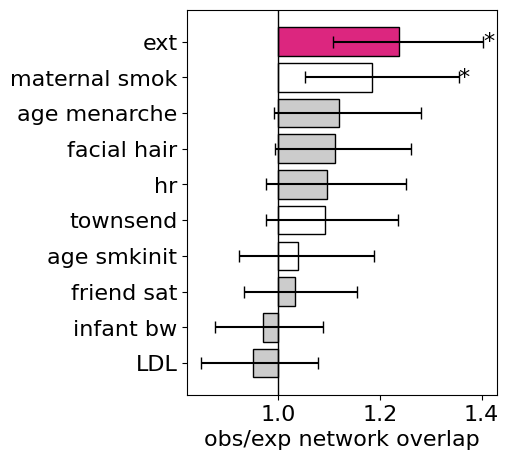

In [168]:
plt.figure(figsize=(4,5))

# Create horizontal bars
bars = plt.barh(y=tbl_sub.hm_label.map(lambda x: x.replace('_',' ')),
                left=1, width=tbl_sub.obs_exp - 1, capsize=4, edgecolor="black",
                xerr=[tbl_sub.lower_error, tbl_sub.upper_error],
                color=tbl_sub.colour)

# Set labels and title
plt.yticks(rotation=0)
plt.xlabel('obs/exp network overlap')
#plt.title(subset)
plt.axvline(x=1, color='black', linestyle='solid', linewidth=1)

# Find the maximum width to set a limit for star placement
max_width = max(tbl_sub.obs_exp - 1 + tbl_sub.upper_error)

# Add significance stars
for i, (bar, sig, upper_err) in enumerate(zip(bars, tbl_sub.sig_overlap, tbl_sub.upper_error)):
    if sig:  # if sig_overlap is True
        # Get the bar's width and position to place the star
        star_x_position = bar.get_width() + 1 + upper_err  # Add a small margin above the error bar
        plt.text(star_x_position, bar.get_y() + bar.get_height() / 2, '*',
                 ha='left', va='center', fontsize=16, color='black')
if save_fig:
    plt.savefig('../figures/barplot_network_overlap_vertical.svg',bbox_inches='tight')

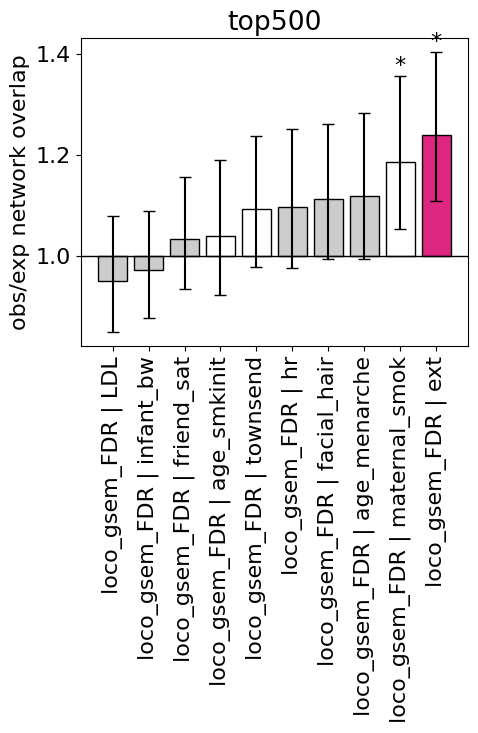

In [165]:

plt.figure(figsize=(5,4))
bars=plt.bar(x = tbl_sub.rat_dataset+' | '+tbl_sub.hm_label,
       bottom= 1, height = tbl_sub.obs_exp-1, capsize=4, edgecolor="black",
        yerr = [tbl_sub.lower_error, tbl_sub.upper_error],
        color =tbl_sub.colour)
plt.xticks(rotation = 90)
plt.ylabel('obs/exp network overlap')
plt.title(subset)
plt.axhline(y = 1, color = 'black', linestyle = 'solid', linewidth=1)
max_height = max(tbl_sub.obs_exp - 1 + tbl_sub.upper_error)

for i, (bar, sig, upper_err) in enumerate(zip(bars, tbl_sub.sig_overlap, tbl_sub.upper_error)):
    if sig:  # if sig_overlap is True
        # Get the bar's height and position to place the star
        # Place the star above the upper error bar
        star_y_position = bar.get_height() + 1 + upper_err  # Add a small margin above the error bar
        plt.text(bar.get_x() + bar.get_width() / 2, star_y_position, '*',
                 ha='center', va='bottom', fontsize=16, color='black')

#plt.ylim(max_height + 0.2)  # Add 20% margin above the tallest bar

if save_fig:
    plt.savefig('../figures/barplot_network_overlap.svg',bbox_inches='tight')

# fix erroneous labels - only run if needed